# Coswara COVID19 Metadata EDA
- '24su Deep Daiv Medical AI Team. Umpah Umpah
- Editor: Noey

## Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 라이브러리 임포트

import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 시각화 한글 폰트 깨짐 현상
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
# 런타임 재시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## Annotation Data
- 품질 분포 확인

In [ ]:
# 폴더 경로 설정
folder = '/content/drive/MyDrive/data/annotations'

# 폴더 내의 모든 CSV 파일 이름 가져오기
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

# 결과를 저장할 빈 데이터프레임 생성
annot_df = pd.DataFrame(columns=['파일명', '2(우수)', '2(우수) 비율', '1(좋음)', '1(좋음) 비율', '0(나쁨)', '0(나쁨) 비율'])

for file in csv_files:
    file_path = os.path.join(folder, file)
    df = pd.read_csv(file_path)

    # 각 품질 점수의 개수 세기
    count_2 = df[df[' QUALITY'] == 2].shape[0]
    count_1 = df[df[' QUALITY'] == 1].shape[0]
    count_0 = df[df[' QUALITY'] == 0].shape[0]

    # 전체 개수 계산
    total_count = count_2 + count_1 + count_0

    # 비율 계산 (소수점 셋째 자리까지)
    ratio_2 = round(count_2 / total_count * 100, 3) if total_count > 0 else 0
    ratio_1 = round(count_1 / total_count * 100, 3) if total_count > 0 else 0
    ratio_0 = round(count_0 / total_count * 100, 3) if total_count > 0 else 0

    # 결과를 임시 데이터프레임에 저장
    temp_df = pd.DataFrame({
        '파일명': [file],
        '2(우수)': [count_2],
        '2(우수) 비율': [ratio_2],
        '1(좋음)': [count_1],
        '1(좋음) 비율': [ratio_1],
        '0(나쁨)': [count_0],
        '0(나쁨) 비율': [ratio_0]
    })

    # 결과 데이터프레임에 추가
    annot_df = pd.concat([annot_df, temp_df], ignore_index=True)

<ipython-input-46-776ba43aaf8d>:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  annot_df = pd.concat([annot_df, temp_df], ignore_index=True)


In [ ]:
annot_df

,파일명,2(우수),2(우수) 비율,1(좋음),1(좋음) 비율,0(나쁨),0(나쁨) 비율
0,breathing-shallow_labels_pravinm.csv,1906,69.410,368,13.401,472,17.189
1,breathing-deep_labels_pravinm.csv,1963,71.486,331,12.054,452,16.460
2,cough-shallow_labels_debarpan.csv,1848,82.796,248,11.111,136,6.093
3,counting-fast_labels_pravinm.csv,1880,84.192,175,7.837,178,7.971
4,cough-heavy_labels_debottam.csv,1927,86.296,167,7.479,139,6.225
5,counting-normal_labels_pravinm.csv,1864,83.475,199,8.912,170,7.613
6,vowel-e_labels_debottam.csv,2166,78.878,319,11.617,261,9.505
7,vowel-o_labels_updated_neeraj.csv,1499,67.159,472,21.147,261,11.694
8,vowel-a_labels_debarpan.csv,1733,77.609,317,14.196,183,8.195


## 메타데이터 병합

In [ ]:
# 폴더 경로 설정
folder_path = '/content/drive/MyDrive/data/meta_data'

# 폴더 내의 모든 CSV 파일 이름 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# CSV 파일을 읽고, 파일명을 열로 추가하여 병합하기
dataframes = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df['file_name'] = file  # 파일명을 'file_name' 열로 추가
    dataframes.append(df)

# 모든 데이터프레임 병합
merged_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
# 결과 확인
merged_df

,id,a,covid_status,record_date,dT,ep,fV,g,l_c,l_l,...,diabetes,ctDate,ctScore,diarrhoea,pneumonia,date,cld,iF,others_resp,test
0,VFeVSfoV7pM9kzFjHMA0R4rs3XB2,36,positive_asymp,2020-10-05,web,y,2.0,female,India,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dvRr97gwv7Y34YqaccErnWcYRY53,25,positive_mild,2020-10-02,web,n,2.0,male,India,Mangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,w7pdOIUnHPRfYLXVVRtIRsOjGnr2,65,positive_moderate,2020-10-02,web,y,2.0,male,India,Manipal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Qt3Wy5zDjYfrcZtylWX0sh5niMa2,26,no_resp_illness_exposed,2020-10-02,web,y,2.0,male,India,Pune,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WyCgdIfGzxXRPeimIoqiPVysAHB2,55,healthy,2020-10-02,web,n,2.0,female,India,Mangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,9JhZlp6ebpZYjnKlK2NTZTihDme2,32,healthy,2020-06-11,web,y,2.0,male,United States,Boston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,RfrT8p9208NHn3170qOYmxel8Kw2,29,healthy,2020-06-12,web,y,2.0,male,India,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,tpCCClZhHxXqu31XbOhexT55KdP2,35,healthy,2020-06-19,web,y,2.0,male,India,Bengaluru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,GuL97vIwJgQudwa7mdoEh33JZnr1,30,no_resp_illness_exposed,2020-07-05,web,y,2.0,male,India,bengaluru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# for annotated audio data checking (record_date)
merged_df[merged_df['id'] == 'Ms3fiiaGeta2PNzjXEE3iMBmh1h1']

,id,a,covid_status,record_date,dT,ep,fV,g,l_c,l_l,...,diabetes,ctDate,ctScore,diarrhoea,pneumonia,date,cld,iF,others_resp,test
1991,Ms3fiiaGeta2PNzjXEE3iMBmh1h1,35,healthy,2020-06-19,web,y,2.0,male,India,Bengaluru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2012 non-null   object 
 1   a                2012 non-null   int64  
 2   covid_status     2012 non-null   object 
 3   record_date      2012 non-null   object 
 4   dT               1408 non-null   object 
 5   ep               2012 non-null   object 
 6   fV               1332 non-null   float64
 7   g                2012 non-null   object 
 8   l_c              2012 non-null   object 
 9   l_l              1781 non-null   object 
 10  l_s              2012 non-null   object 
 11  rU               1332 non-null   object 
 12  um               1055 non-null   object 
 13  cold             224 non-null    object 
 14  cough            312 non-null    object 
 15  fever            157 non-null    object 
 16  st               120 non-null    object 
 17  bd            

### 잘 병합됐는지 확인

In [ ]:
# 병합된 데이터프레임에서 'file_name' 열의 고유한 값들 추출
unique_file_names = merged_df['file_name'].unique()

# csv_files 리스트를 배열로 변환 (정렬된 상태에서 비교하기 위해)
csv_files_sorted = sorted(csv_files)

# 고유한 파일명도 정렬
unique_file_names_sorted = sorted(unique_file_names)

# 두 리스트가 같은지 비교
files_match = csv_files_sorted == unique_file_names_sorted

# 결과 출력
if files_match:
    print("둘이 일치! 잘 병합됨.")
else:
    print("완벽하게 fit하지 않음.")
    print("CSV 파일들: ", csv_files_sorted)
    print("DataFrame의 file_name: ", unique_file_names_sorted)

둘이 일치! 잘 병합됨.


## 요약 통계량

### null counts

In [ ]:
# 각 열의 null 값 비율 계산
null_ratios = merged_df.isnull().mean() * 100

# null 비율을 퍼센트로 출력
print(null_ratios)

id                  0.000000
a                   0.000000
covid_status        0.000000
record_date         0.000000
dT                 30.019881
ep                  0.000000
fV                 33.797217
g                   0.000000
l_c                 0.000000
l_l                11.481113
l_s                 0.000000
rU                 33.797217
um                 47.564612
cold               88.866799
cough              84.493042
fever              92.196819
st                 94.035785
bd                 93.290258
ftg                92.097416
mp                 93.638171
loss_of_smell      95.775348
file_name           0.000000
ctScan             84.592445
smoker             78.727634
test_status        66.202783
vacc               84.592445
testType           87.326044
test_date          87.326044
ht                 92.693837
ihd                99.005964
asthma             95.178926
others_preexist    97.465209
diabetes           92.644135
ctDate             94.930417
ctScore       

In [ ]:
merged_df.isnull().sum()

,0
id,0
a,0
covid_status,0
record_date,0
dT,604
ep,0
fV,680
g,0
l_c,0
l_l,231


In [ ]:
md = len(merged_df)
L = []
for feature in merged_df.columns:
    l = merged_df[feature].isnull().sum()
    if l > 0:
        print(f"{feature} has {(l/md)*100:.2f}% null values")
        if(l /md < 0.7):
            L.append(feature)

dT has 30.02% null values
fV has 33.80% null values
l_l has 11.48% null values
rU has 33.80% null values
um has 47.56% null values
cold has 88.87% null values
cough has 84.49% null values
fever has 92.20% null values
st has 94.04% null values
bd has 93.29% null values
ftg has 92.10% null values
mp has 93.64% null values
loss_of_smell has 95.78% null values
ctScan has 84.59% null values
smoker has 78.73% null values
test_status has 66.20% null values
vacc has 84.59% null values
testType has 87.33% null values
test_date has 87.33% null values
ht has 92.69% null values
ihd has 99.01% null values
asthma has 95.18% null values
others_preexist has 97.47% null values
diabetes has 92.64% null values
ctDate has 94.93% null values
ctScore has 94.93% null values
diarrhoea has 98.71% null values
pneumonia has 98.41% null values
date has 69.98% null values
cld has 98.56% null values
iF has 96.22% null values
others_resp has 98.01% null values
test has 99.95% null values


In [ ]:
L

['dT', 'fV', 'l_l', 'rU', 'um', 'test_status', 'date']

In [ ]:
merged_df.dT.unique()   # 얘는 딱히 상관 없을듯, 업로드 방식에 대해 묻는 것

array(['web', nan, 'android'], dtype=object)

In [ ]:
merged_df.fV.unique()    # 뭘 의미하는 것인지 전혀 모르겠음, Table 3를 아무리 들여다봐도 나오질 않음..

array([ 2., nan])

In [ ]:
merged_df.test_status.unique()

array([nan, 'na', 'p', 'n'], dtype=object)

In [ ]:
merged_df.l_l.unique()   # 환자의 지역에 대해서 기입한 란인 것 같음

array(['Bangalore', 'Mangalore ', 'Manipal ', 'Pune', 'Mangalore',
       'New Delhi', 'Arbutus', 'Jigani', 'Paschim Bardhhaman', 'Udupi',
       'w', 'Dakshina Kannada ', nan, 'Bengaluru', 'Hyderabad',
       'Msrmc- Bangalore ', 'VISAKHAPAYNAM ', 'Bangalore ', 'Nizamabad',
       'Shivamogga', 'Krishna', 'Kottayam', 'Ernakulam', 'Cuttack',
       'mancherial', 'Bangalore Urban', 'Bangalore urban', 'Bengaluru ',
       'Gainesville', 'Visakhapatnam', 'Idukki', 'Champapet',
       'MsrmcMsrmc-Bangalore ', 'Kurnool', 'Msrmc-bangalore', 'bangalore',
       'Malang', 'Banda', 'Chelyabinsk', 'Hoai Duc', 'One', 'MS Ramaiah',
       'M S Ramaiah', 'Rajahmundry', ' Bangalore ', 'Anantapur ',
       'Bhopal', 'Mumbai', 'MUMBAI', 'kolkata', 'BANGALORE', 'Manipal',
       'Hinduja hospital', 'Hinduja hospital ', 'chandigarh',
       'Hyderabad ', 'Thane', 'BARC anushakti nagar', 'Cary', 'Mumbai ',
       'bucuresti', 'Dombivali/Thablne', "A'zaz", 'gurgaon', 'MUMBAi',
       'Trichy', 'Bubaneswar

In [ ]:
merged_df.rU.unique()

array(['n', 'y', nan], dtype=object)

In [ ]:
num_feat = [feature for feature in merged_df.columns if merged_df[feature].dtype!='O']
num_feat

['a', 'fV', 'ctScore']

### 열 합치기

In [ ]:
data = merged_df.copy()

# 카테고리 묶기
covid_symptoms_columns = ['cough', 'cold', 'diarrhoea', 'bd', 'st', 'fever', 'ftg', 'mp', 'loss_of_smell']
respiratory_ailments_columns = ['asthma', 'cld', 'pneumonia', 'others_resp']
comorbidity_columns = ['ht', 'diabetes', 'ihd', 'others_preexist']

In [ ]:
data['COVID_symptoms'] = data[covid_symptoms_columns].any(axis=1)
data['Respiratory_ailment'] = data[respiratory_ailments_columns].any(axis=1)
data['Comorbidity'] = data[comorbidity_columns].any(axis=1)

In [ ]:
data.head()

,id,a,covid_status,record_date,dT,ep,fV,g,l_c,l_l,...,diarrhoea,pneumonia,date,cld,iF,others_resp,test,COVID_symptoms,Respiratory_ailment,Comorbidity
0,VFeVSfoV7pM9kzFjHMA0R4rs3XB2,36,positive_asymp,2020-10-05,web,y,2.0,female,India,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,dvRr97gwv7Y34YqaccErnWcYRY53,25,positive_mild,2020-10-02,web,n,2.0,male,India,Mangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
2,w7pdOIUnHPRfYLXVVRtIRsOjGnr2,65,positive_moderate,2020-10-02,web,y,2.0,male,India,Manipal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
3,Qt3Wy5zDjYfrcZtylWX0sh5niMa2,26,no_resp_illness_exposed,2020-10-02,web,y,2.0,male,India,Pune,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,WyCgdIfGzxXRPeimIoqiPVysAHB2,55,healthy,2020-10-02,web,n,2.0,female,India,Mangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False


In [ ]:
data.covid_status.value_counts()

,count
covid_status,
healthy,1291
positive_mild,230
no_resp_illness_exposed,160
resp_illness_not_identified,127
recovered_full,91
positive_moderate,72
positive_asymp,41


In [ ]:
data_edit = data.copy()
data_edit = data_edit[data_edit['covid_status'] != 'healthy']
data_edit = data_edit[data_edit['covid_status'] != 'no_resp_illness_exposed']
data_edit = data_edit[data_edit['covid_status'] != 'recovered_full']
data_edit = data_edit[data_edit['covid_status'] != 'resp_illness_not_identified']

In [ ]:
data_edit.COVID_symptoms.value_counts()

,count
COVID_symptoms,
True,284
False,59


In [ ]:
data.Respiratory_ailment.value_counts()

,count
Respiratory_ailment,
False,1864
True,148


In [ ]:
data.Comorbidity.value_counts()

,count
Comorbidity,
False,1736
True,276


### describe

In [ ]:
merged_df.describe()

,a,fV,ctScore
count,2012.000000,1332.0,102.000000
mean,34.593936,2.0,4.941176
std,13.417061,0.0,5.088958
min,1.000000,2.0,0.000000
25%,25.000000,2.0,0.000000
50%,31.000000,2.0,4.000000
75%,42.000000,2.0,8.750000
max,90.000000,2.0,20.000000


In [ ]:
numerical = ['a', 'fV', 'ctScore']
for col in numerical:
  print(f"'{col}'의 Null 비율:", merged_df[col].isnull().mean() * 100)

'a'의 Null 비율: 0.0
'fV'의 Null 비율: 33.79721669980119
'ctScore'의 Null 비율: 94.93041749502981


- a: 나이
- fV:
- ctScore: Covid Health의 CT Value

## 분포 시각화

### 연령

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

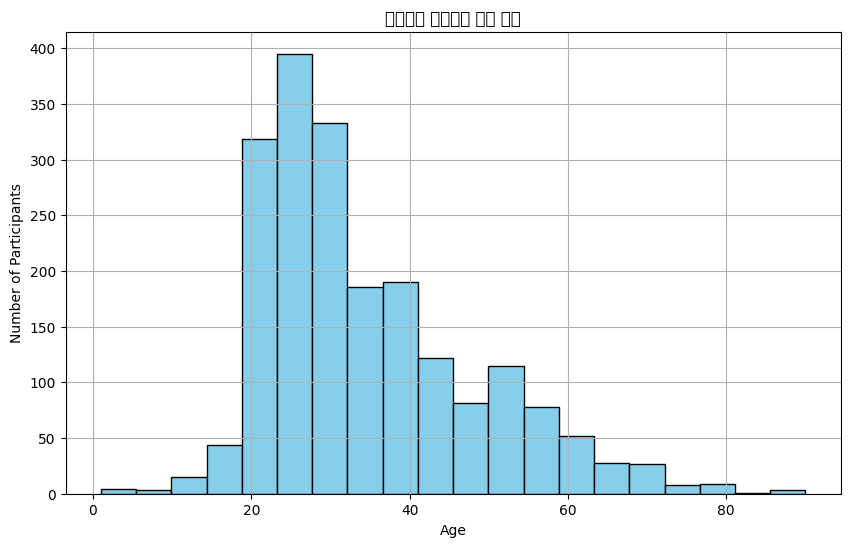

In [ ]:
# 데이터셋의 첫 번째 시각화: 연령 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
plt.hist(merged_df['a'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('데이터셋 참가자의 연령 분포')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.show()

### 성별

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

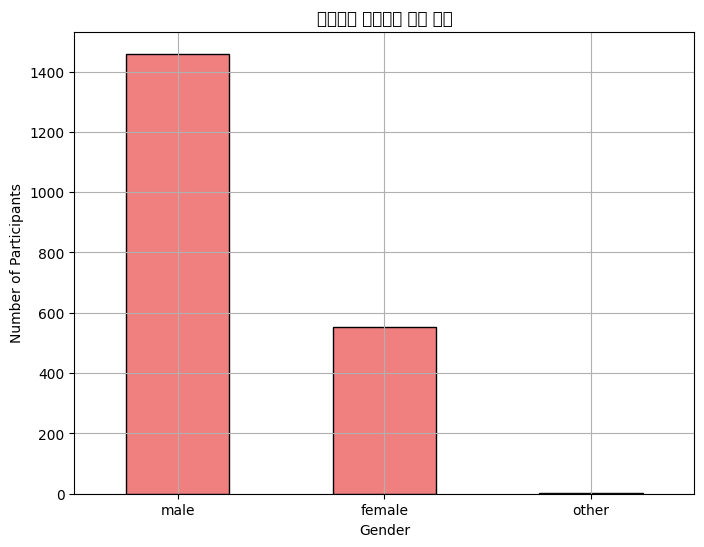

In [ ]:
# 성별 분포 시각화 (막대 차트)
gender_counts = merged_df['g'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('데이터셋 참가자의 성별 분포')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### 코로나

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


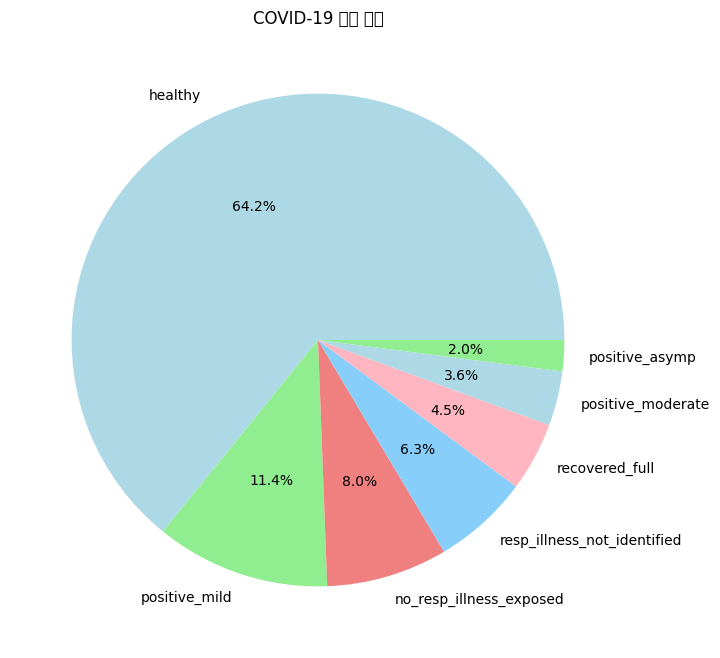

In [ ]:
# 코로나 상태 분포 시각화 (파이 차트)
covid_status_counts = merged_df['covid_status'].value_counts()

plt.figure(figsize=(8, 8))
covid_status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('COVID-19 상태 분포')
plt.ylabel('')  # y축 라벨 제거
plt.show()

## 교차 분석
- 백신 접종 상태와 코로나19 상태 간의 관계 시각화

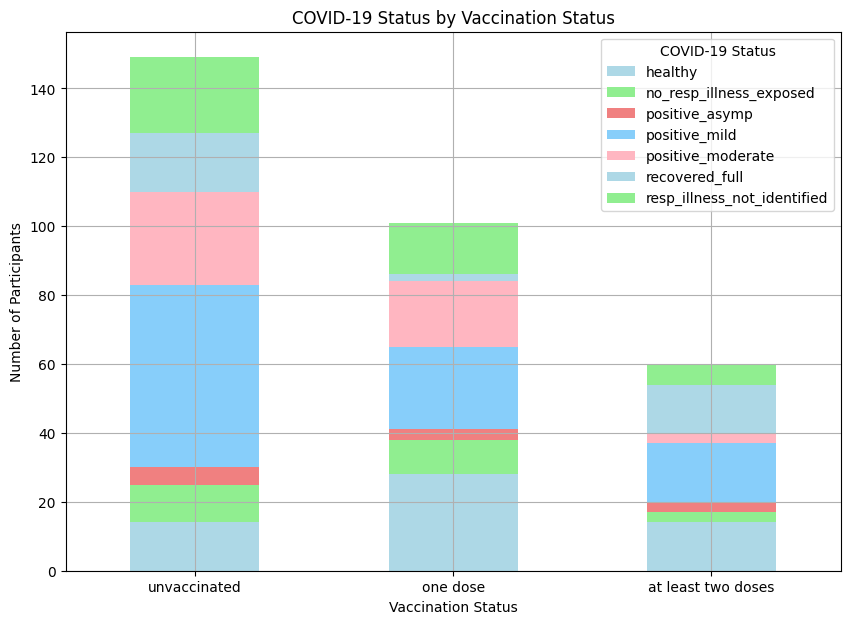

In [ ]:
# 백신 접종 상태와 코로나19 상태 간의 관계 시각화 (교차 분석)
vacc_covid_crosstab = pd.crosstab(merged_df['vacc'], merged_df['covid_status'])

ax = vacc_covid_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('COVID-19 Status by Vaccination Status')
plt.xlabel('Vaccination Status')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)

# y (at least two doses)/p (one dose)/n (unvaccinated)
ax.set_xticklabels(['unvaccinated', 'one dose', 'at least two doses'])
plt.legend(title='COVID-19 Status')
plt.grid(True)
plt.show()

1. **백신 접종 상태와 건강 상태의 관계**:
   - **미접종자(unvaccinated)**: 미접종자 중에서는 COVID-19에 걸리지 않고 건강한(`healthy`) 비율이 낮고, 다양한 `positive` 상태를 보이는 비율이 상대적으로 높음
   - **한 번 접종자(one dose)**: 한 번 접종한 참가자들은 미접종자보다 `positive` 상태의 비율이 낮음, 그러나 여전히 감염된 사례가 있으며, `exposed` 상태도 나타날 수 있음
   - **두 번 이상 접종자(at least two doses)**: 두 번 이상 접종한 참가자들은 `healthy` 상태의 비율이 가장 높으며, COVID-19 감염(`positive`) 상태의 비율이 낮음

2. **백신 접종의 효과**:
   - 전반적으로, 백신을 접종한 참가자들이 COVID-19에 감염될 확률이 낮아지는 경향이 있음
   - 특히, 두 번 이상 백신을 접종한 경우, 심각한 증상(`positive_moderate`)이 거의 나타나지 않거나 매우 낮은 비율로 나타남

3. **감염 경향**:
   - 백신 접종이 이루어진 참가자들 사이에서 `positive_mild` 또는 `positive_asymptomatic`와 같은 경증 상태가 더 많이 나타날 수 있음
   - 반대로, 백신을 맞지 않은 참가자들은 더 다양한 `positive` 상태를 나타내며, 특히 중증 상태의 비율이 상대적으로 높음